## $\color{green}{\text{Ciencia de Datos:}}$ Visualización de la Información
UNAM-IIMAS, Semestre 2023-2
## $\color{blue}{\text{Práctica-06: Proporciones, distribuciones y cantidades}}$

Para esta práctica usar:
- Dataset: $\color{red}{\text{Inmigración canadiense de 1980 a 2013}}$
- **Gráficos de Área**
- **Gráficos de barras verticales, con marcas de tendencia**

In [33]:
import numpy as np  # útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca primaria de estructura de datos

In [34]:
df_can = pd.read_excel('Canada.xls',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [35]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


$\color{blue}{\text{Vamos hacer una limpieza de los datos para facilitar la creación de las visualizaciones}}$.
* **Remover** las columnas 'AREA', 'REG', 'DEV', 'Type', 'Coverage'.
* Definir nombres más adecuados a las columnas 'OdName', 'AreaName' y 'RegName'.
* Asegurarse de que todas las columnas (DataFrame.columns) corresponden a tipo *string* (cadena).
* Usar el método *set_index()* del dataFrame para que los índices de las entradas sean los **Países**.
* Adicionar una columna de "**Total**", en donde ésta represente la *suma del flujo total de migrantes hacia Canada desde los diferentes paises a lo largo de los años*.


In [36]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [37]:
# Limpiar el conjunto de datos para eliminar columnas innecesarias
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Cambiemos el nombre de las columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para tener coherencia, también hagamos que todas las etiquetas de columna sean de tipo cadena
df_can.columns = list(map(str, df_can.columns))

# Se agrega una columna de "Total"
df_can['Total'] = df_can.sum(axis=1)

# Años que usaremos en esta practica - útil para trazar más adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_71015/1088920804.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [38]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [39]:
# Examinemos los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)

df_can.columns = list(map(str, df_can.columns))

# Ahora vamos a comprobar los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)

# Veamos los primeros cinco elementos y veamos cómo se cambió el marco de datos
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## $\color{blue}{\text{Gráficas de línea}}$

El diagrama de líneas es una herramienta útil para mostrar *varias variables dependientes* contra una *variable independiente*. Sin embargo, se recomienda no más de 5-10 líneas en un solo gráfico; más que eso y se vuelve difícil de interpretar.

**Actividad**: Compare la tendencia de los 5 principales países que más contribuyeron a la inmigración a Canadá.

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt

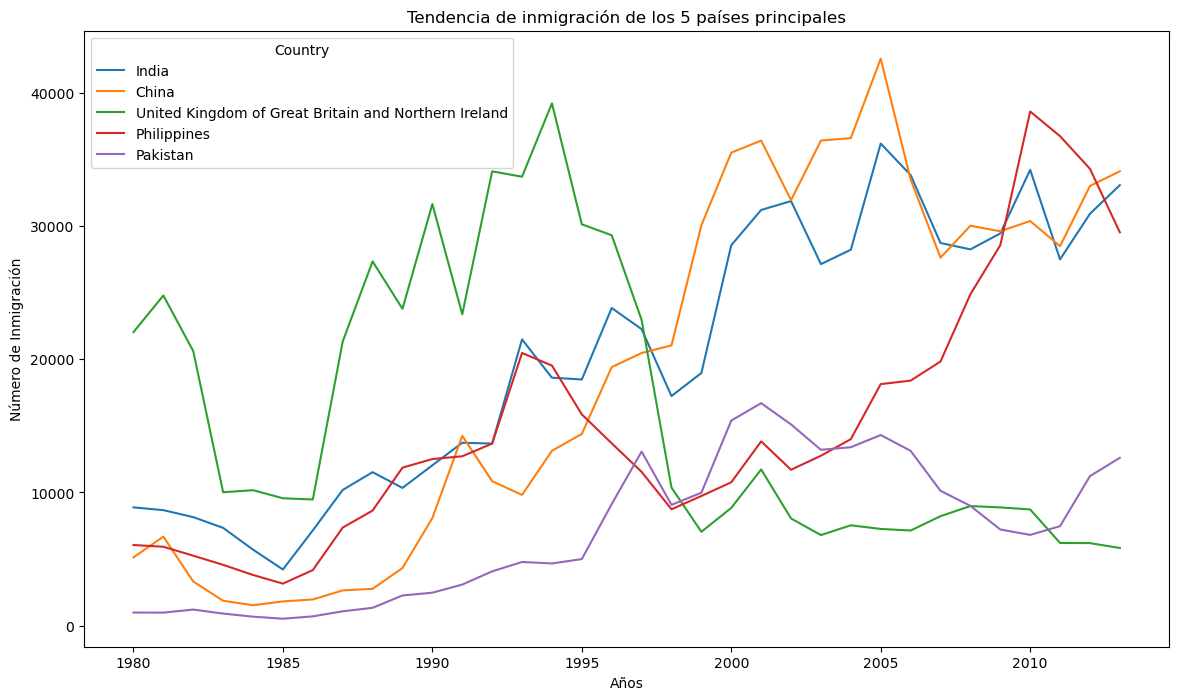

In [41]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
 
# print(df_top5)
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Tendencia de inmigración de los 5 países principales')
plt.ylabel('Número de Inmigración')
plt.xlabel('Años')
plt.show()

## $\color{blue}{\text{Gráficas de área}}$

Con una pequeña modificación al código, podemos visualizar este diagrama como un _Diagrama acumulativo_, también conocido como **Diagrama de Líneas Apiladas** o _Diagrama de áreas_.

In [42]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Obtener las 5 principales entradas
df_top5 = df_can.head()

# Transponer el marco de datos
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Los gráficos de área se apilan de forma predeterminada. Y para producir un gráfico de áreas apiladas, cada columna debe tener valores **positivos** o **negativos** (cualquier valor de NaN se establecerá de forma predeterminada en 0). Para producir un gráfico no apilado, pase `stacked=False`.

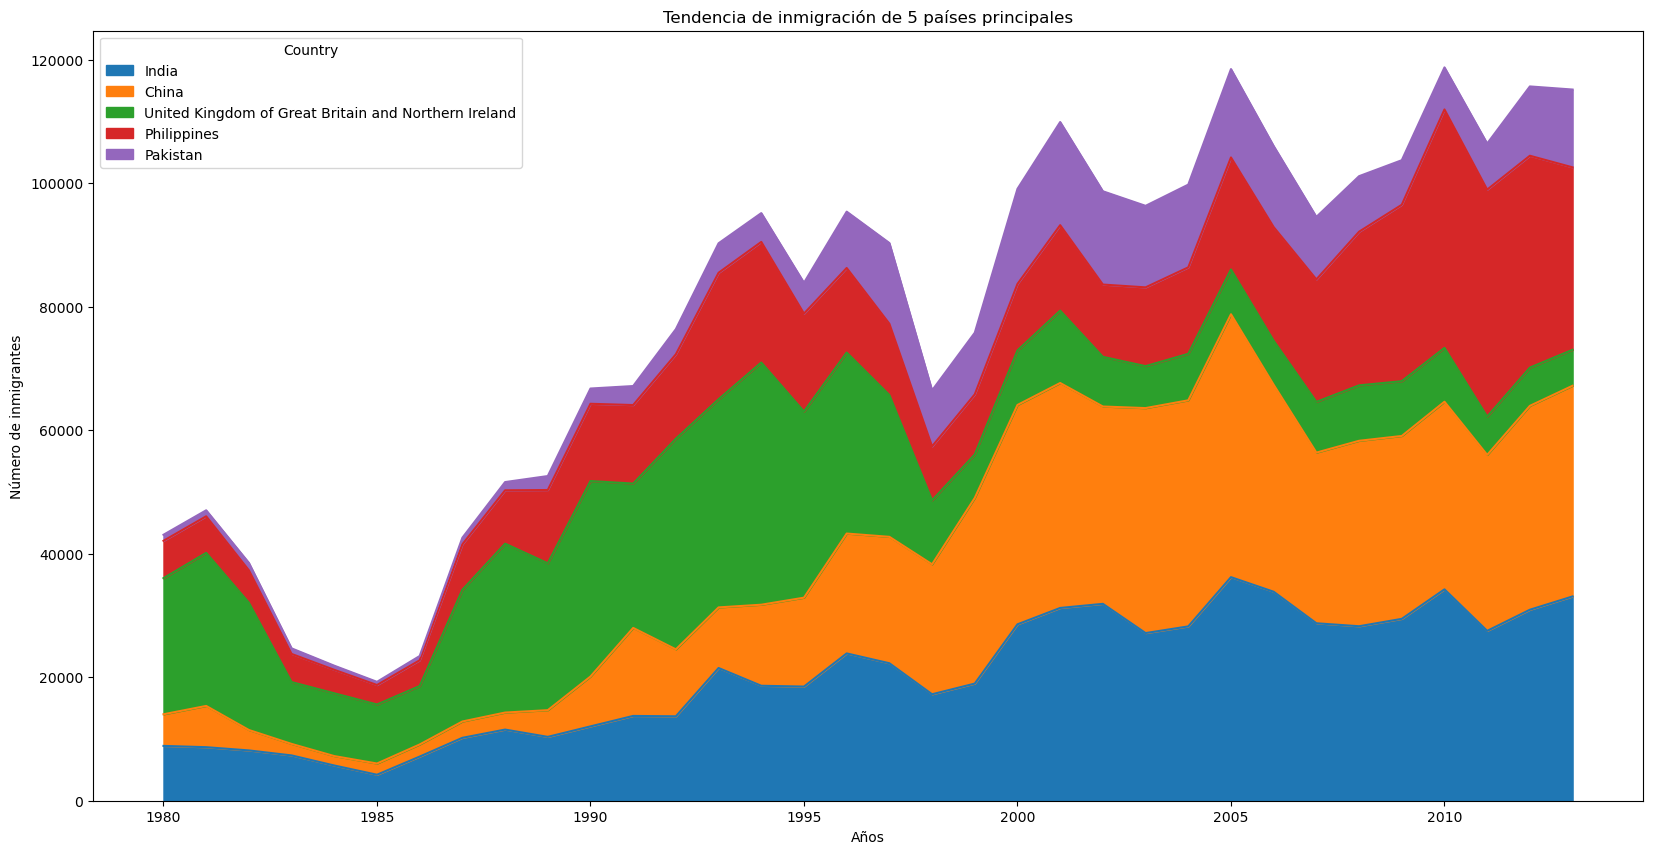

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Cambiemos los valores de índice de df_top5 para escribir un número entero para trazar
# df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
            )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

plt.show()

Presentarlo ahora como porcentaje de proporciones

In [44]:
df_perc = df_top5.divide(df_top5.sum(axis=1), axis=0)
df_perc.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,0.206142,0.118927,0.511758,0.140469,0.022704
1981,0.184307,0.142046,0.527115,0.125869,0.020663
1982,0.211473,0.085866,0.535237,0.136249,0.031175
1983,0.297350,0.075492,0.405827,0.184861,0.036470
1984,0.260814,0.069822,0.465021,0.173800,0.030544


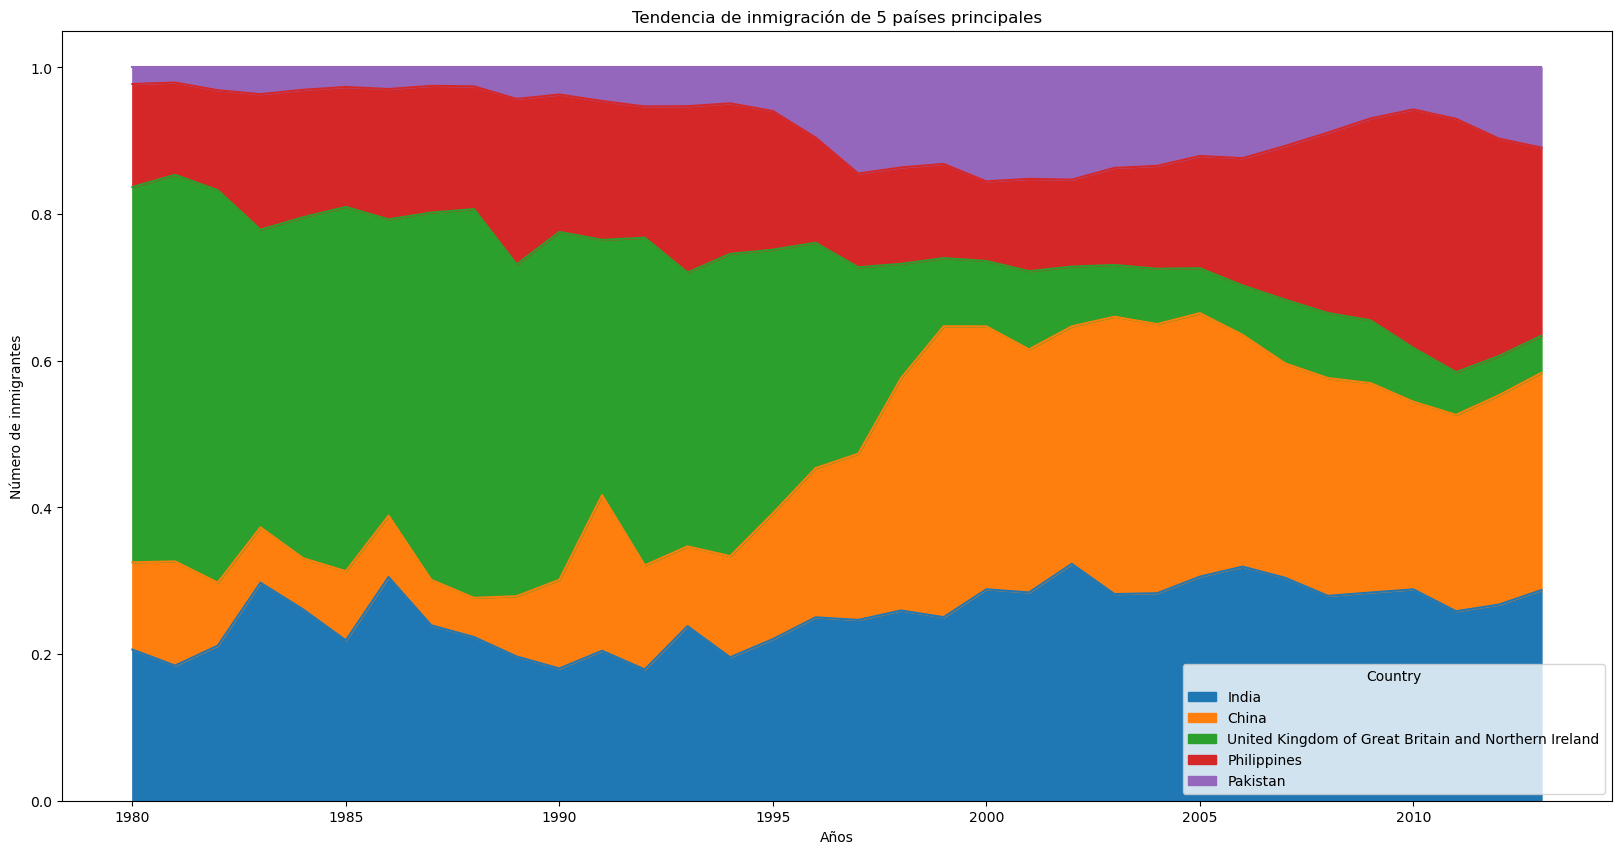

In [45]:
df_perc.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
             )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

plt.show()

**Actividad**: Use la capa Artist (*método orientado a objetos*) para crear un diagrama de área no apilada de los 5 países que menos contribuyeron a la inmigración a Canadá desde 1980 hasta 2013. Use un valor de transparencia de 0.55.

In [46]:
# Obtener los 5 paises con menor aporte
df_least5 = df_can.tail(5)

# Transponer el marco de datos
df_least5 = df_least5[years].transpose() 

df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


Text(0.5, 0, 'Años')

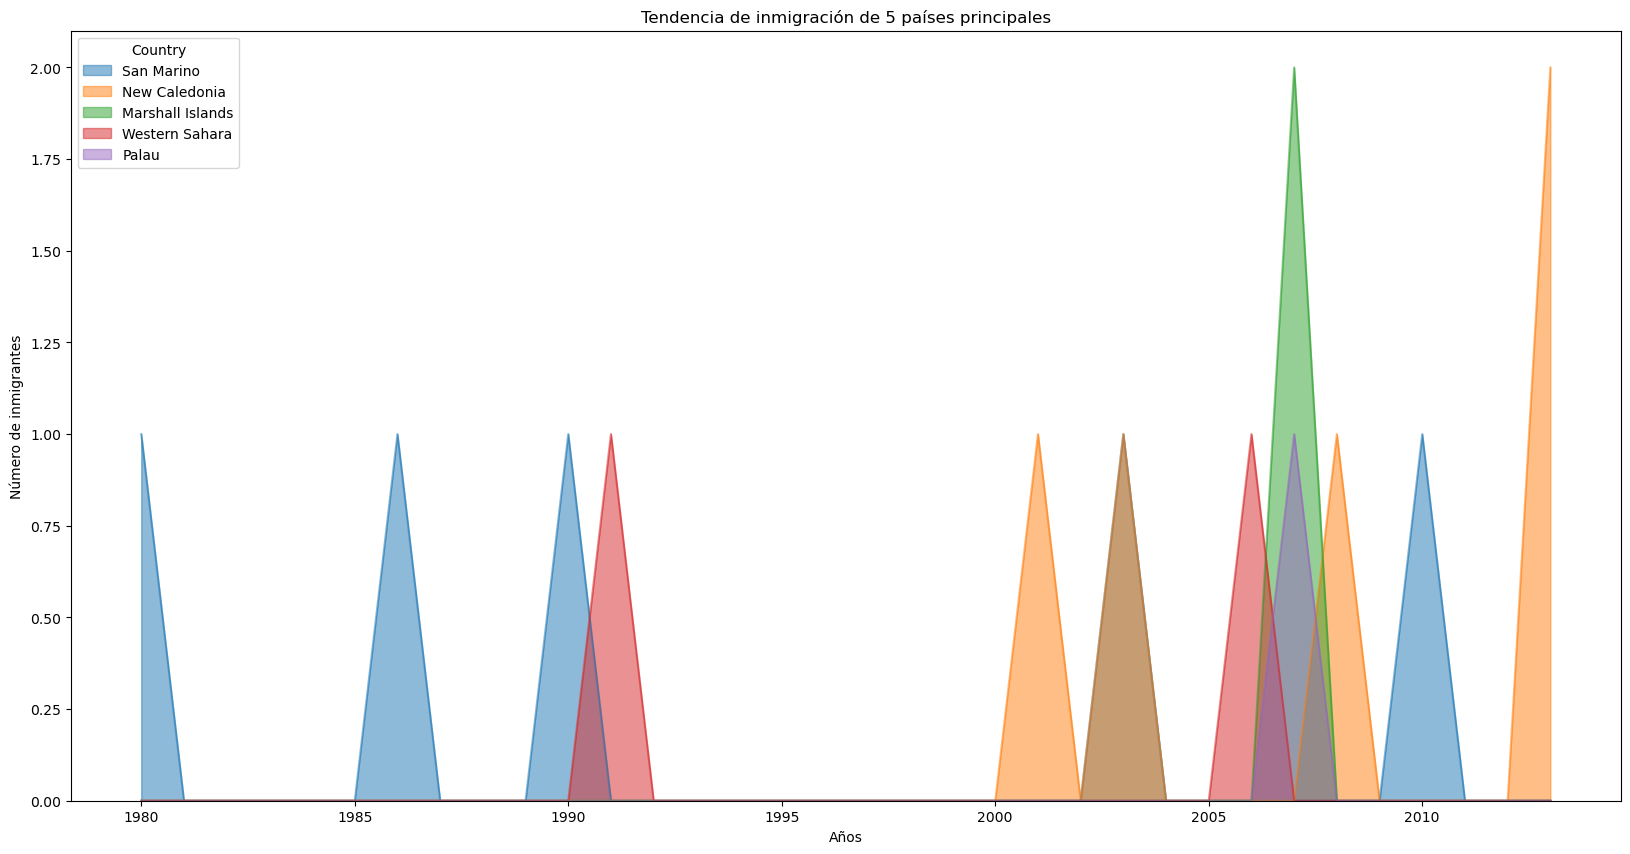

In [47]:
df_least5.plot(kind='area', 
             figsize=(20, 10), # pasar una tupla de tamaño (x,y)
             stacked=False,
             )

plt.title('Tendencia de inmigración de 5 países principales')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

Text(0.5, 0, 'Años')

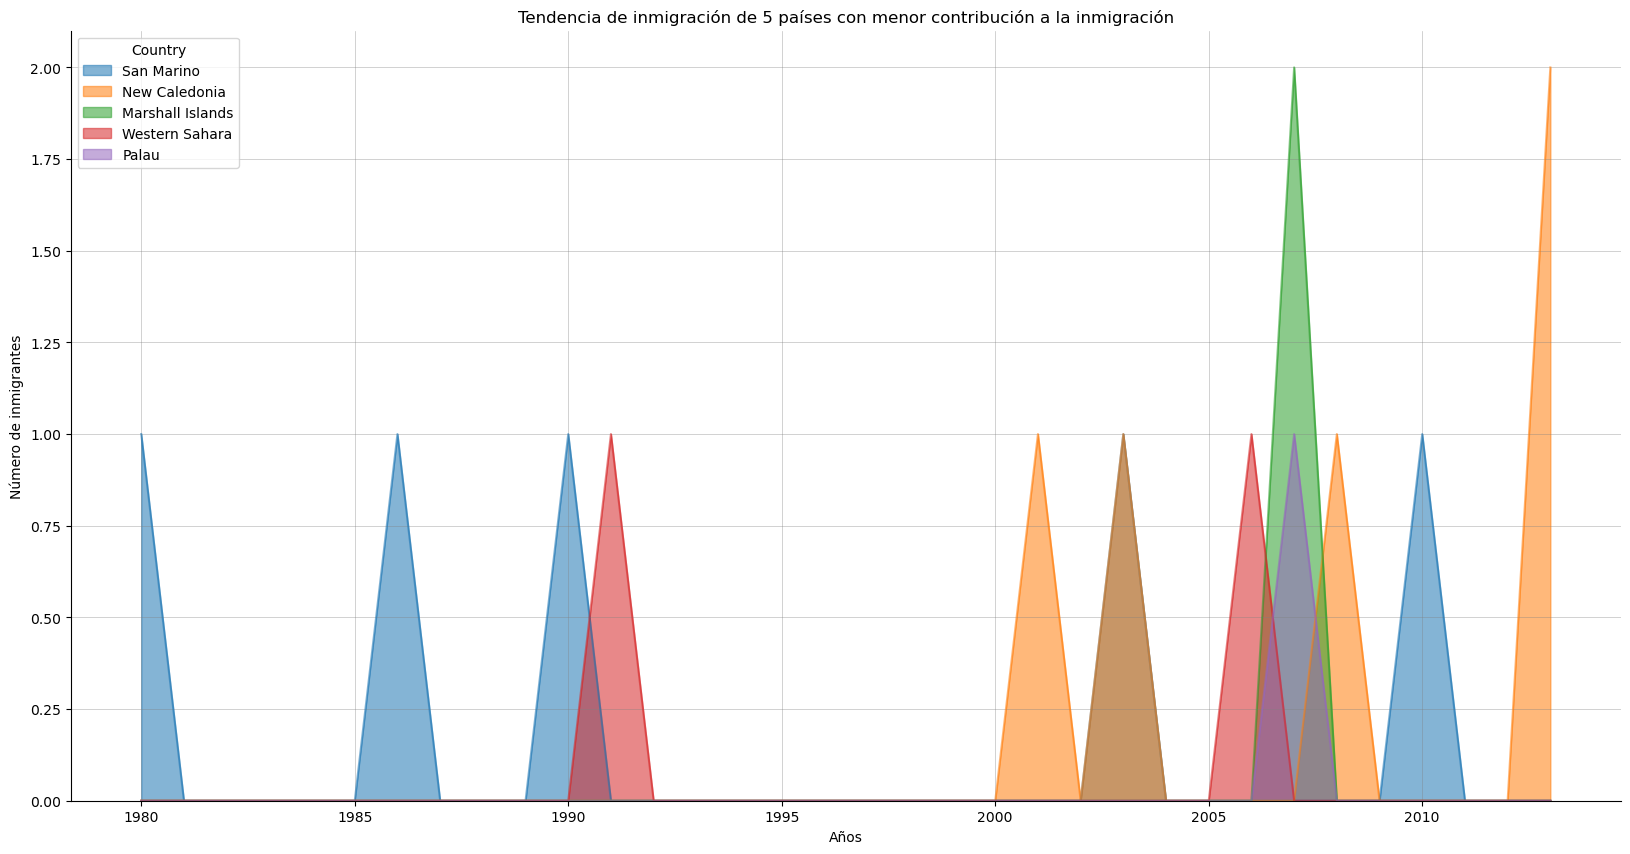

In [48]:
# cambiemos los valores de índice de df_least5 para escribir un número entero para trazar
df_least5.index = df_least5.index.map(int) 

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

ax.set_title('Tendencia de inmigración de 5 países con menor contribución a la inmigración')
ax.set_ylabel('Número de inmigrantes')
ax.set_xlabel('Años')


**Actividad**: Utilice la capa de secuencias (método procesal) de comandos para crear un gráfico de áreas apiladas de los 5 países que menos contribuyeron a la inmigración a Canadá entre 1980 y 2013. Utilice un valor de transparencia de 0,45.

In [49]:
df_can.sort_values(['Total'], ascending = True, axis = 0, inplace = True)

# Obtener las 5 entradas principales
df_least5 = df_can.head()

# Transponer el marco de datos
df_least5 = df_least5[years].transpose()

df_least5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


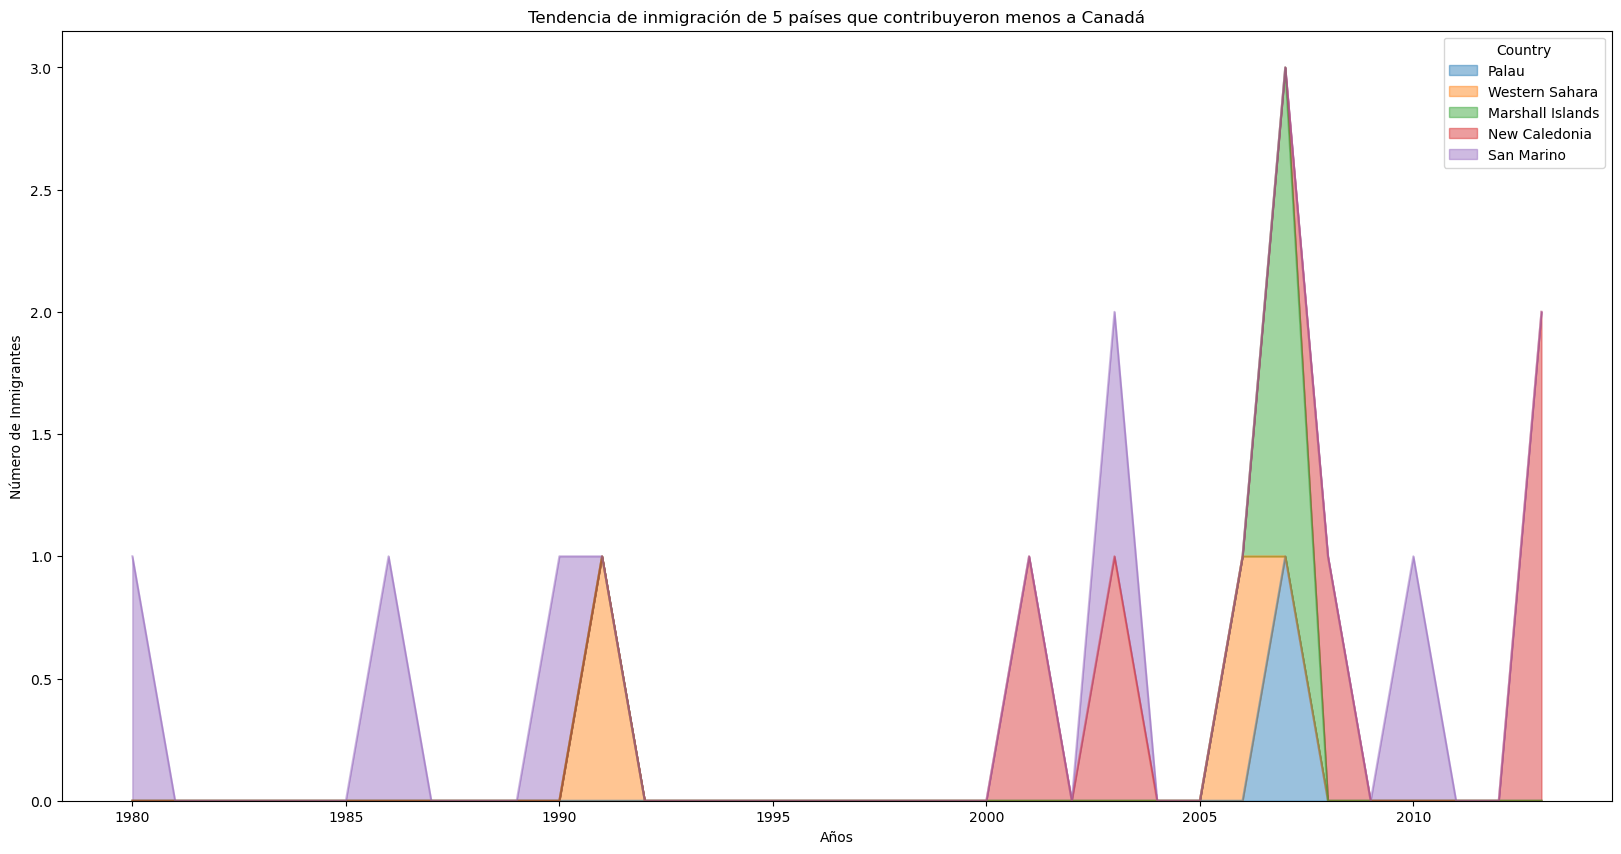

In [50]:
df_least5.index = df_least5.index.map(int) # cambie el valor del índice para escribir un número entero
df_least5.plot(kind='area', 
             alpha=0.45, # 0-1, valor por defecto a= 0.5
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Tendencia de inmigración de 5 países que contribuyeron menos a Canadá')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Años')

plt.show()

## $\color{blue}{\text{Gráficos de barras (marco de datos)}}$ <a id="10"></a>

Un gráfico de barras es una forma de representar datos donde la _longitud_ de las barras representa la magnitud/tamaño de la característica/variable. Los gráficos de barras generalmente representan variables numéricas y categóricas agrupadas en intervalos.

Para crear un gráfico de barras, podemos pasar uno de los dos argumentos a través del parámetro `kind` en `plot()`:

-   `kind=bar` crea un gráfico de barras _vertical_
-   `kind=barh` crea un gráfico de barras _horizontal_


## $\color{blue}{\text{Gráfica de barras verticales}}$

En los gráficos de barras verticales, el eje $x$ se usa para etiquetar, y la longitud de las barras en el eje $y$ corresponde a la magnitud de la variable que se mide. Los gráficos de barras verticales son particularmente útiles para analizar datos de series de tiempo. Una desventaja es que carecen de espacio para el etiquetado de texto al pie de cada barra.

**$\color{red}{\text{Empecemos analizando el efecto de la crisis financiera de Islandia:}}$**

La crisis financiera islandesa de 2008 - 2011 fue un evento económico y político importante en Islandia. En relación con el tamaño de su economía, el colapso bancario sistémico de Islandia fue el mayor experimentado por cualquier país en la historia económica. La crisis condujo a una grave depresión económica entre 2008 y 2011 y a un importante malestar político.

**Actividad:** Comparemos el número de Inmigrantes islandeses (país = 'Islandia') en Canadá desde el año 1980 hasta el 2013.

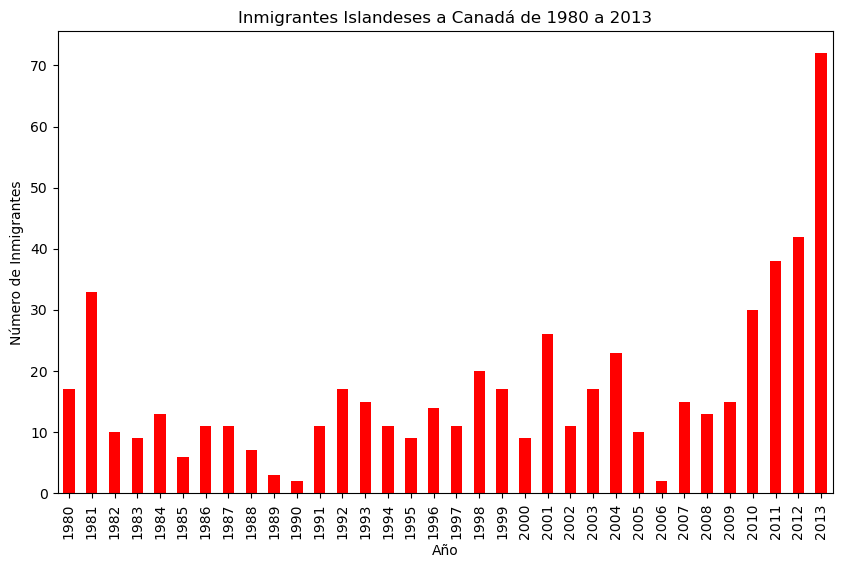

In [51]:
# Paso 1: obtener los datos
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

# Paso 2: graficar datos
df_iceland.plot(kind='bar', figsize=(10, 6), color="red")

plt.xlabel('Año') # agregue la etiqueta "x" a la trama
plt.ylabel('Número de Inmigrantes') # agregue la etiqueta "y" a la trama
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013') # añadir título a la trama

plt.show()

El diagrama de barras de arriba muestra el número total de inmigrantes desglosados por cada año. Podemos ver claramente el impacto de la crisis financiera; el número de inmigrantes a Canadá comenzó a aumentar rápidamente después de 2008.

Anotemos esto en el gráfico usando el método `annotate` de la capa de secuencias de comandos **scripting layer** o la interfaz pyplot **pyplot interface**. Pasaremos los siguientes parámetros:

- `s`: str, el texto de la anotación.
- `xy`: Tupla que especifica el punto (x,y) a anotar (en este caso, el punto final de la flecha).
- `xytext`: Tupla que especifica el punto (x,y) para colocar el texto (en este caso, punto de inicio de la flecha).
- `xycoords`: El sistema de coordenadas en el que se da xy - 'data' usa el sistema de coordenadas del objeto que se está anotando (predeterminado).
- `arrowprops`: Toma un diccionario de propiedades para dibujar la flecha:
    - `arrowstyle`: Especifica el estilo de la flecha, `'->'` es la flecha estándar.
    - `connectionstyle`: Especifica el tipo de conexión. `arc3` es una línea recta.
    - `color`: especifica el color del error.
    - `lw`: Especifica el ancho de línea.

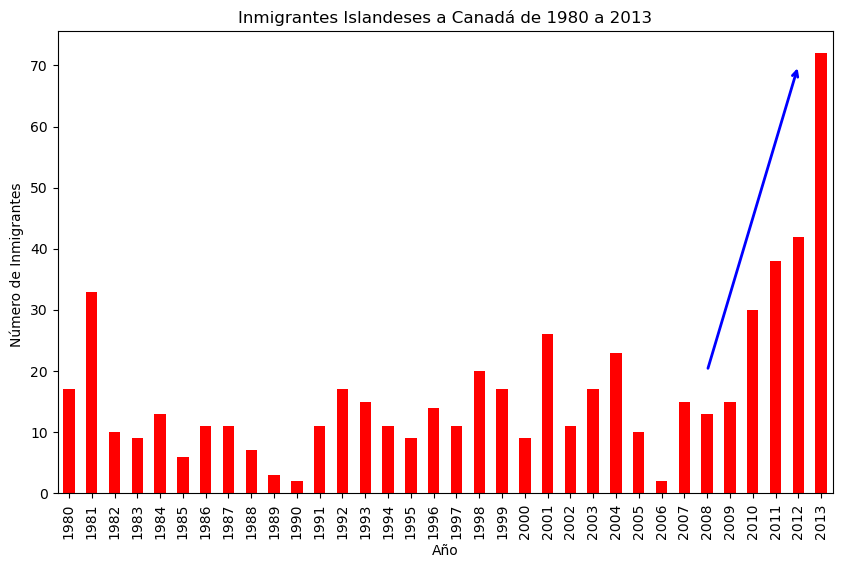

In [52]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90, color="red") # gire los xticks (puntos etiquetados en el eje x) 90 grados

plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes ')
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013')

# Anotar flecha
plt.annotate('',                      # s: str. Lo dejará en blanco para que no haya texto.
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012, pop 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008, pop 20)
             xycoords='data',         # utilizará el sistema de coordenadas del objeto que se está anotando
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Anotemos también un texto para pasar por encima de la flecha. Pasaremos los siguientes parámetros adicionales:

-   `rotation`: ángulo de rotación del texto en grados (en sentido antihorario)
-   `va`: Alineación vertical del texto [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: Alineación horizontal del texto [‘center’ | ‘right’ | ‘left’]


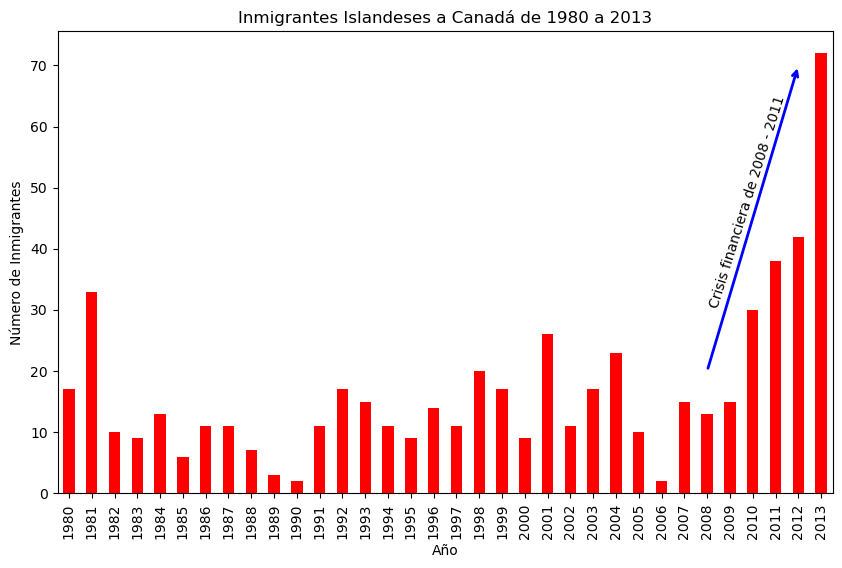

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90, color='red') 

plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.title('Inmigrantes Islandeses a Canadá de 1980 a 2013')

# Anotar flecha
plt.annotate('',                      # s: str. Lo dejará en blanco para que no haya texto
             xy=(32, 70),             # coloque la punta de la flecha en el punto (año 2012, pop 70)
             xytext=(28, 20),         # coloque la base de la flecha en el punto (año 2008, pop 20)
             xycoords='data',         # utilizará el sistema de coordenadas del objeto que se está anotando
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Anotar texto
plt.annotate('Crisis financiera de 2008 - 2011', # texto para mostrar
             xy=(28, 30),                    # comience el texto en un punto (año 2008, pop 30) 
             rotation=72.5,                  # basado en prueba y error para que coincida con la flecha
             va='bottom',                    # desea que el texto se alinee verticalmente en la "inferior"
             ha='left',                      # desea que el texto esté alineado horizontalmente a la 'izquierda'.
            )

plt.show()

## $\color{blue}{\text{Gráficos circulares}}$

Un gráfico circular es un gráfico que muestra proporciones numéricas dividiendo un círculo en porciones proporcionales. Podemos crear gráficos circulares en Matplotlib pasando la palabra clave **kind=pie**.

$\color{red}{\text{Usemos un gráfico circular para explorar la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes durante todo el período de 1980 a 2013.}}$

**Paso 1**: Recopilar datos.

Usaremos el método pandas **groupby** para resumir los datos de inmigración por continente. El proceso general de groupby implica los siguientes pasos:

* **Dividir**: dividir los datos en grupos según algunos criterios.
* **Aplicar**: Aplicar una función a cada grupo de forma independiente: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
* **Combinar**: combinar los resultados en una estructura de datos.

In [54]:
# Agrupar países por continentes y aplicar la función sum()
df_continents = df_can.groupby('Continent', axis=0).sum()

# nota: la salida del método groupby es un objeto "groupby".
# no podemos usarlo más hasta que apliquemos una función (por ejemplo, .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


**Paso 2**: Trazar los datos. Pasaremos la palabra clave kind = 'pie', junto con los siguientes parámetros adicionales:

* **autopct**: es una cadena o función utilizada para etiquetar las cuñas con su valor numérico. La etiqueta se colocará dentro de la cuña. Si es una cadena de formato, la etiqueta será fmt%pct.

* **startangle**: gira el inicio del gráfico circular en grados de ángulo en sentido antihorario desde el eje $x$.

* **shadow**: dibuja una sombra debajo del pastel (para dar una sensación de 3D).

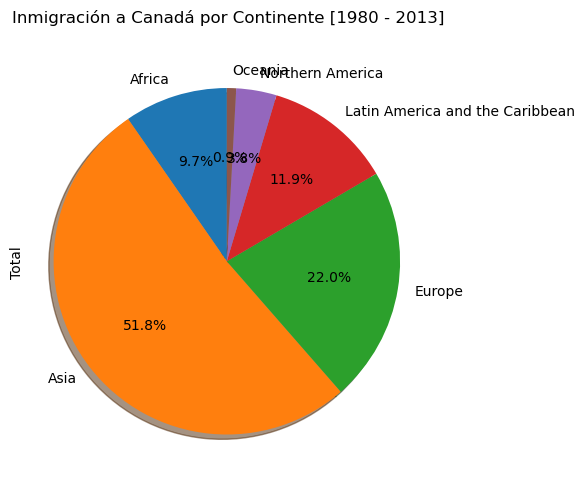

In [55]:
# autopct crear %, el ángulo de inicio representa el punto de inicio
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añadir en porcentajes
                            startangle=90,     # ángulo de inicio 90° (África)
                            shadow=True,       # añadir sombra      
                            )

plt.title('Inmigración a Canadá por Continente [1980 - 2013]')
plt.axis('equal') # Establece el gráfico circular.

plt.show()

La imagen anterior no es muy clara, los números y el texto se superponen en algunos casos. Hagamos algunas modificaciones para mejorar las imágenes:

- Elimine las etiquetas de texto en el gráfico circular pasando la leyenda y agréguela como una leyenda separada usando **plt.legend()**.

- Empuje los porcentajes para que queden justo fuera del gráfico circular pasando el parámetro **pctdistance**.

- Pase un conjunto personalizado de colores para los continentes pasando el parámetro de colores.

- Expanda el gráfico circular para enfatizar los tres continentes más bajos (África, América del Norte y América Latina y el Caribe) pasando el parámetro de _explode_.

In [56]:
df_continents['Total']

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

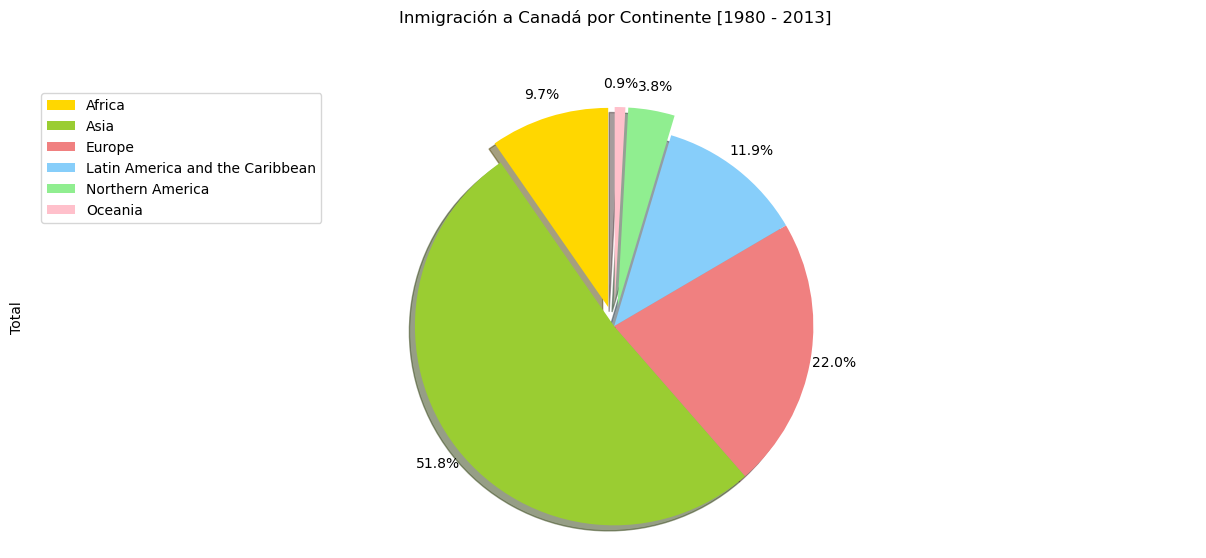

In [57]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # relación para cada continente con la que compensar cada cuña.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # desactive las etiquetas en el gráfico circular
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            explode=explode_list # "explotar" los 3 continentes más bajos
                            )

# Aumentar el título en un 12% para que coincida con pctdistance
plt.title('Inmigración a Canadá por Continente [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## EJERCICIOS:

* $\color{red}{\text{(1)}}$ Elabore una gráfica de barras horizontales, pero ahora hágalo para 3 periodos diferentes: 1980-1989, 1990-1999, 2000-2009; de manera que pueda visualizar la evolución de los datos de inmigración canadiense. 

In [58]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [59]:
# Select the columns from 1980 to 1989
first_period = df_can.loc[:, '1980':'1989']

# Select the columns from 1990 to 1999
second_period = df_can.loc[:, '1990':'1999']

# Select the columns from 2000 to 2009
third_period = df_can.loc[:, '2000':'2009']

In [60]:
first_period

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Country,,,,,,,,,,
Palau,0,0,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0,0,0
Marshall Islands,0,0,0,0,0,0,0,0,0,0
New Caledonia,0,0,0,0,0,0,0,0,0,0
San Marino,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795


/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

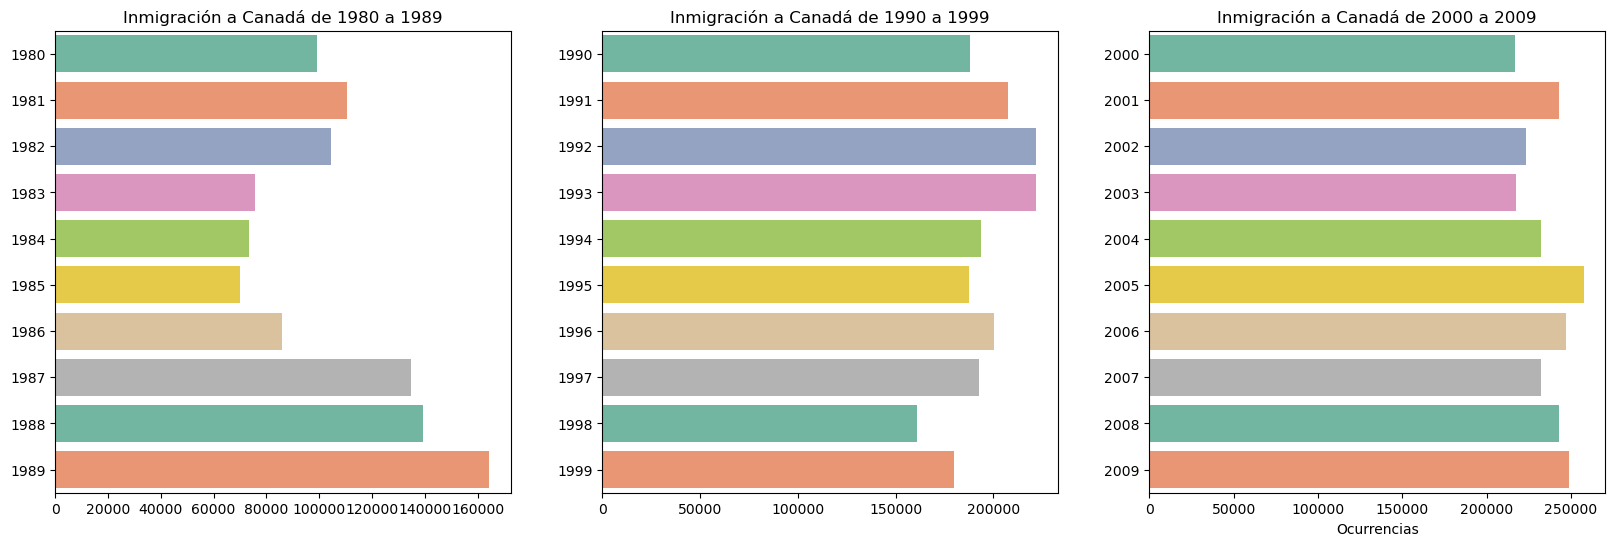

In [61]:
import seaborn as sns

my_palette1 = sns.color_palette('Set2', n_colors=10)
my_palette2 = sns.color_palette('bright', n_colors=10)
my_palette3 = sns.color_palette('muted', n_colors=10)
my_palette4 = sns.color_palette('pastel', n_colors=10)
my_palette5 = sns.color_palette('deep', n_colors=10)

X_1 = first_period.columns
y_1 = first_period.sum().values

X_2 = second_period.columns
y_2 = second_period.sum().values

X_3 = third_period.columns
y_3 = third_period.sum().values

figure, ax = plt.subplots(1,3,figsize=(20, 6))

sns.barplot(y_1, X_1, orient='h', palette=my_palette1, ax=ax[0])
ax[0].set_title('Inmigración a Canadá de 1980 a 1989')

sns.barplot(y_2, X_2, orient='h', palette=my_palette1, ax=ax[1])
ax[1].set_title('Inmigración a Canadá de 1990 a 1999')

sns.barplot(y_3, X_3, orient='h', palette=my_palette1, ax=ax[2])
ax[2].set_title('Inmigración a Canadá de 2000 a 2009')

plt.xlabel('Ocurrencias')
plt.show()

* $\color{red}{\text{(2)}}$ Analice el efecto de la crisis financiera de Argentina en el 2003.

In [62]:
argentina_data = df_can.loc['Argentina', years]
X = []
Y = []
for x, y in argentina_data.items():
    X.append(x)
    Y.append(y)

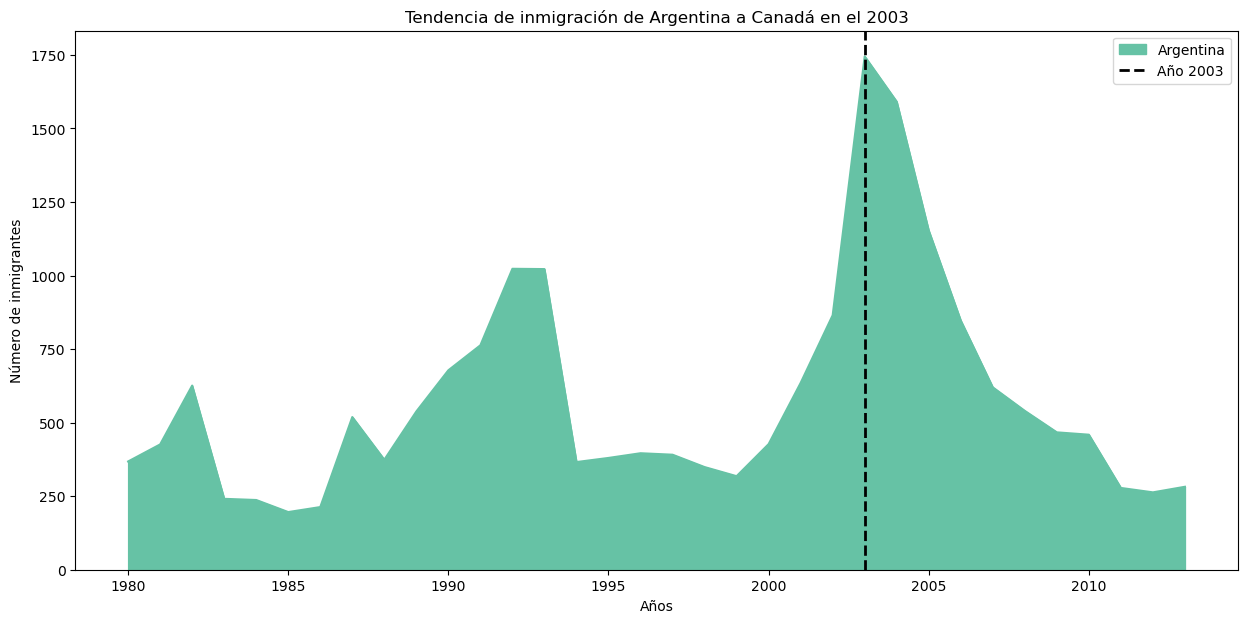

In [63]:
argentina_data.plot(kind='area', figsize=(15, 7), color = my_palette1[0])
plt.axvline(x=23, color='black', linestyle='--', linewidth=2, label='Año 2003')

plt.title('Tendencia de inmigración de Argentina a Canadá en el 2003')
plt.ylabel('Número de inmigrantes')
plt.legend()
plt.xlabel('Años')

plt.show()

* $\color{red}{\text{(3)}}$ Usando un gráfico circular, explore la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes en el año 2013.

In [64]:
continents = df_can.groupby('Continent').sum()
year_2013 = continents['2013'].values
conts = continents.index.values.tolist()

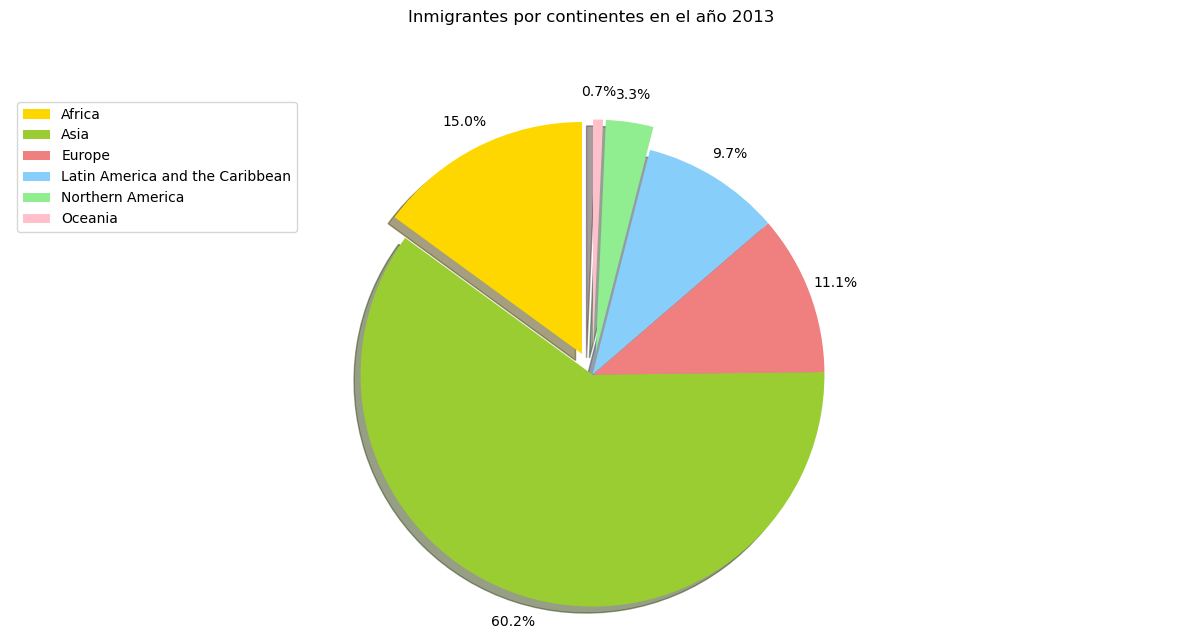

In [65]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # relación para cada continente con la que compensar cada cuña.

plt.figure(figsize=(15, 7))
plt.pie(year_2013, labels=None,
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            explode=explode_list # "explotar" los 3 continentes más bajos
                            )
plt.axis('equal') 
plt.title('Inmigrantes por continentes en el año 2013', y = 1.12)
plt.legend(labels = conts, loc = 'upper left')
plt.show()

## Conclusión

En general la práctica nos ayudó a entender mejor diferentes maneras de mostrar nuestra información y entender el propósito y la ayuda que nos da cada una de estas técticas, es por ello que en el primer ejercicio, se utilizó una gráfica de barras horizontales para mostrar la evolución de los datos de inmigración canadiense en tres períodos diferentes esto con la finalidad de comparar en los diferentes años, las tendencias de inmigración hacia Canadá provenientes de cualquier parte del mundo, esta visualización nos sirve mucho para entender los cambios a lo largo del tiempo. En el segundo ejercicio, se exploró el efecto de la crisis financiera de Argentina en el 2003 y por esto se utilizó una gráfica de área que es similar a una de línea para mostrar la evolución del número de inmigrantes argentinos a Canadá antes y después de la crisis, esto pues esta técnica permite identificar las tendencias a lo largo del tiempo y comparar diferentes períodos. Finalmente en el último ejercicio se utilizó un gráfico circular para visualizar la proporción de nuevos inmigrantes por continentes en el año 2013. Esta técnica es útil para resaltar la distribución relativa de los datos, permitiendo una rápida comprensión de las tendencias principales.

En general, estos ejercicios demuestran la importancia de la visualización de datos para explorar y analizar la información de manera efectiva. Las diferentes técnicas y herramientas pueden ser utilizadas según el tipo de datos y el objetivo específico de la exploración o análisis.